In [118]:
def calculate_distance(p, q):
    """ Calculate Euclidean distance between two points."""
     # p and q are tuples of (x,y)
    distance = np.sqrt((p[0]-q[0])**2 + (p[1]-q[1])**2)
    return distance

In [119]:
def neighbor_vote(labels):
    """ Get the majority label from k neighbors."""
    # Is it possible to have a tie? How would you handle that?
    vote = labels.value_counts().idxmax()
    # if tie happens, take first index
    return vote

In [120]:
def knn_classifier(labeled_points, label, new_point, k):
    """ Given classified points and one new point, 
    return a prediction based on the votes of k neighbors."""
    ilist = []
    
    for i in labeled_points:
        dist = calculate_distance(new_point,i)
        ilist.append(dist)
    
    ilist = pd.concat([pd.Series(ilist),pd.Series(label)], axis = 1)
    
    ilist.columns = ['dist', 'label']
    
    ilist.sort_values('dist', inplace = True)
    ilist = ilist.head(k)
    prediction = neighbor_vote(ilist['label'])
    return prediction

In [88]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

# import data
iris = datasets.load_iris()
X = iris.data[:100, :2]  # use the first two features and just the first two classes.
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Split 70/30 into initial data and new points to classify
training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

In [112]:
len(training_df)

70

In [122]:
new_pt = (6,3.4)

knn_classifier(X_train,y_train,new_pt,4)

1

""" Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy."""

In [121]:
for n, nwpt in enumerate(X_test):
    print n, knn_classifier(X_train,y_train,nwpt,5)

0 1
1 1
2 1
3 0
4 0
5 0
6 0
7 1
8 0
9 0
10 0
11 0
12 1
13 0
14 1
15 0
16 1
17 1
18 0
19 0
20 1
21 1
22 0
23 0
24 1
25 0
26 0
27 1
28 0
29 1


""" BONUS: plot the labeled points and an example of a new point being classified."""

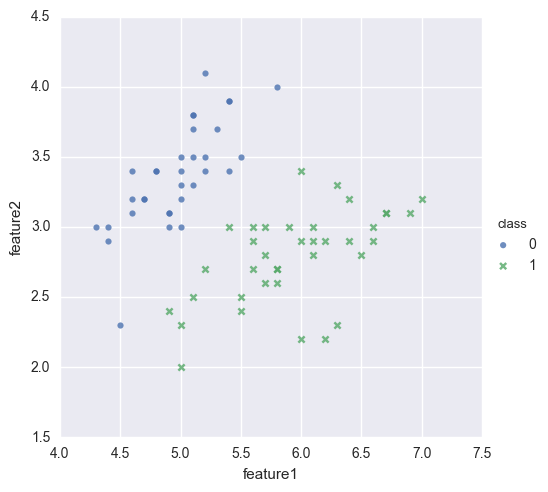

In [136]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='feature1', y='feature2', data= training_df, hue= 'class', fit_reg = False, markers=["o", "x"]);